## Final Project Submission

Please fill out:
* Student name: Justin Grisanti
* Student pace: self paced
* Scheduled project review date/time: 8/20/2021 at 5:30 pm
* Instructor name: Jeff Herman
* Blog post URL: TBD


# Section 1: Business Understanding

The purpose of this section is to understand what the business problem and the stakeholders that will be understanding the work that I am performing. The stakeholder of my project is a real-estate start-up that tries to find the "true value" of your home. 
The main purpose of this algorithm is predictive, meaning that the model should be able to take in attributes of houses that have an outdated housing price, and to predict a "true value" price. This can help both home-sellers and home-buyers agree to a fair price. 

The secondary purpose of this algorithm is inferential, meaning that the model should reveal something about the relationship between the attributes of a housing attributes and its price. I will apply my knowledge of statistics to include appropriate dialogue about these relationships. This could help home-owners take the necessary steps to modify their home to maximize a potential return.


# Section 2: Data Understanding

Based on what I see below, I understand the following about the data. First, it comes from Kings County, Washington, based on what I can see from latitude and longitude. Second, it includes several items related to housing information, including beds and baths, lot size, and condition/grade. This data is useful because it has many attributes that can impact the target variable. In this case, I will be using price as my target variable and will use the other variables to predict price using regression.

In [285]:
# To import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn.preprocessing as sk

In [286]:
kc_house = pd.read_csv("data/kc_house_data.csv")

Looking at the data below, there seems to be many rows of data. At first glance, every column seems to be relevant to the determination of price. I will run a correlation matrix below to determine which columns actually appear to impact price.

In [287]:
x_kc = kc_house.drop("price", axis=1)
y_kc = kc_house["price"]

x_kc

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [288]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_kc, y_kc, random_state=42)

print(f"x_train is a DataFrame with {x_train.shape[0]} rows and {x_train.shape[1]} columns")
print(f"y_train is a Series with {x_train.shape[0]} values")

x_train is a DataFrame with 16197 rows and 20 columns
y_train is a Series with 16197 values


In [289]:
x_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [290]:
x_train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.619700e+04,16197.000000,16197.000000,16197.000000,1.619700e+04,16197.000000,14441.000000,16148.000000,16197.000000,16197.000000,16197.000000,16197.000000,13318.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,4.596556e+09,3.372229,2.116426,2083.693030,1.507189e+04,1.494752,0.007686,0.232165,3.410385,7.658702,1790.467926,1971.019942,81.993843,98078.100080,47.560975,-122.213720,1987.809286,12784.065074
std,2.888074e+09,0.905951,0.768049,918.209756,4.077585e+04,0.540474,0.087338,0.766092,0.650777,1.169277,827.598600,29.325399,396.213694,53.486457,0.138273,0.141639,685.189105,26833.379871
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.122049e+09,3.000000,1.750000,1430.000000,5.058000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.472500,-122.329000,1490.000000,5100.000000
50%,3.905082e+09,3.000000,2.250000,1912.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.573300,-122.231000,1840.000000,7620.000000
75%,7.338403e+09,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.000000,47.678300,-122.124000,2360.000000,10086.000000
max,9.900000e+09,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Next, I ran a histogram of price to further understand the data. As normality is an assumption of linear regression, it seems that there are outliers here that could be handled. I will only focus on houses with prices below $1.2M as this is where majority of the data lies.

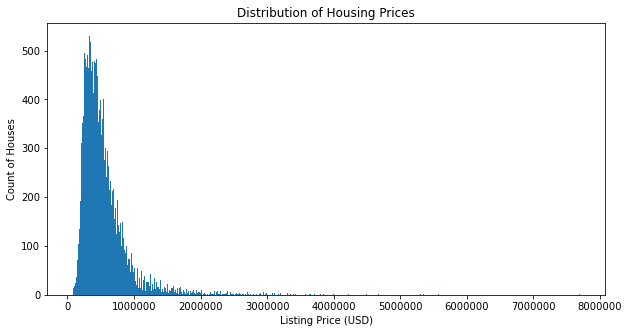

In [291]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=500)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Housing Prices");

# Section 3: Data Preparation

Next step is to prepare/clean the data to ensure that nothing is causing any blockers for my model. I will take a look at the value counts to see if there are any errors at first glance.

In [292]:
for col in x_train:
    print(col, '\n', x_train[col].value_counts(normalize=True), '\n\n')

id 
 6669020290    0.000123
7888000390    0.000123
1139600270    0.000123
1922059278    0.000123
3395040550    0.000123
                ...   
8078430030    0.000062
4177100005    0.000062
5608010980    0.000062
7515000035    0.000062
582000644     0.000062
Name: id, Length: 16103, dtype: float64 


date 
 4/27/2015     0.006359
6/26/2014     0.006297
6/23/2014     0.006236
3/25/2015     0.005927
7/8/2014      0.005927
                ...   
5/15/2015     0.000062
5/27/2015     0.000062
2/1/2015      0.000062
11/28/2014    0.000062
8/3/2014      0.000062
Name: date, Length: 366, dtype: float64 


bedrooms 
 3     0.453109
4     0.320059
2     0.128048
5     0.074026
6     0.012286
1     0.009384
7     0.002037
8     0.000617
9     0.000247
10    0.000123
11    0.000062
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249305
1.00    0.177687
1.75    0.141755
2.25    0.094338
2.00    0.088473
1.50    0.067729
2.75    0.054269
3.00    0.035253
3.50    0.033957
3.25    0.027227
4.00

There is a fair mix of categorical and quantitative variables. I will start by analyzing the following categorical variables: date, bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated and zip code. 

Floors, watefront, view, condition, and grade seem to be fine at first glance. Bedrooms has some data that have a crazy amount of bedrooms, so I will look at the price to determine if those entries are typos or not. 

Date, yr_built, yr_renovated, and zip code have many entries so I will try to look into those deeper, as well.

In [293]:
x_train[x_train['bedrooms'] > 7]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4063,7226500100,2/19/2015,8,3.00,2850,12714,1.0,NaN,0.0,3,7,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942
15056,7418000130,12/11/2014,8,3.25,4300,10441,2.0,0.0,0.0,4,8,2800,1500.0,1979,0.0,98059,47.4786,-122.131,1780,10457
8748,1773100755,8/21/2014,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
17221,1338600225,5/28/2014,8,3.50,4440,6480,2.0,0.0,3.0,5,10,3140,1300.0,1959,0.0,98112,47.6310,-122.303,4440,8640
9068,6746700615,3/18/2015,8,2.50,2280,3000,1.5,0.0,0.0,3,7,1210,1070.0,1911,0.0,98105,47.6675,-122.316,1610,3000
4231,2902200015,1/6/2015,9,3.00,3680,4400,2.0,0.0,0.0,3,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
9443,2769600590,10/16/2014,8,4.00,4020,7500,1.0,0.0,0.0,3,8,2010,2010.0,1968,0.0,98107,47.6732,-122.363,1560,3737
19287,3756900027,11/25/2014,8,3.00,3840,15990,1.0,0.0,0.0,3,7,2530,1310.0,1961,0.0,98034,47.7111,-122.211,1380,8172
4092,1997200215,5/7/2014,9,4.50,3830,6988,2.5,0.0,0.0,3,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
18462,1346300150,10/20/2014,8,4.00,7710,11750,3.5,0.0,0.0,5,12,6090,1620.0,1904,0.0,98112,47.6263,-122.314,4210,8325


This bedroom data seems reasonable with the amount of sqft associated with it. I will now check the remaining date and zip code columns.

In [294]:
x_train['yr_built'].value_counts().to_dict()

{2014: 417,
 2006: 345,
 2005: 342,
 1977: 327,
 2004: 324,
 2007: 319,
 1978: 305,
 2003: 303,
 1968: 296,
 2008: 284,
 1967: 268,
 1979: 249,
 1959: 245,
 1954: 232,
 1990: 229,
 1962: 227,
 2001: 225,
 1969: 225,
 1989: 218,
 1988: 208,
 1999: 208,
 1987: 206,
 1955: 203,
 1947: 192,
 1963: 192,
 1960: 192,
 1966: 191,
 1994: 187,
 1980: 186,
 1976: 185,
 2009: 181,
 1951: 179,
 1942: 175,
 1950: 174,
 1948: 172,
 1984: 172,
 1985: 171,
 1991: 171,
 1958: 169,
 2000: 166,
 1998: 165,
 1953: 165,
 1952: 162,
 2002: 161,
 1996: 159,
 1961: 158,
 1986: 154,
 1983: 154,
 1957: 150,
 1993: 149,
 1975: 149,
 1956: 149,
 1949: 145,
 1981: 144,
 1965: 142,
 2013: 141,
 1992: 140,
 1964: 138,
 1997: 137,
 1926: 134,
 1925: 129,
 1941: 125,
 2012: 121,
 1995: 120,
 1940: 116,
 1973: 115,
 1943: 114,
 1944: 114,
 1970: 109,
 1924: 108,
 2010: 107,
 1972: 102,
 2011: 102,
 1974: 100,
 1928: 99,
 1910: 92,
 1918: 91,
 1946: 89,
 1927: 86,
 1982: 86,
 1971: 84,
 1929: 81,
 1945: 75,
 1906: 75,
 1

In [295]:
x_train['yr_renovated'].value_counts().to_dict()

{0.0: 12771,
 2014.0: 49,
 2005.0: 24,
 2013.0: 23,
 2003.0: 23,
 2007.0: 23,
 2000.0: 20,
 1990.0: 19,
 2009.0: 17,
 2006.0: 16,
 2004.0: 15,
 1984.0: 13,
 1999.0: 13,
 2001.0: 12,
 1983.0: 12,
 2015.0: 12,
 1997.0: 11,
 2010.0: 11,
 2008.0: 11,
 1986.0: 11,
 1989.0: 11,
 1994.0: 11,
 1991.0: 11,
 2002.0: 11,
 1993.0: 10,
 1992.0: 10,
 1995.0: 10,
 1985.0: 10,
 1998.0: 10,
 2011.0: 8,
 2012.0: 8,
 1968.0: 7,
 1996.0: 7,
 1977.0: 7,
 1980.0: 6,
 1987.0: 6,
 1979.0: 5,
 1988.0: 5,
 1970.0: 4,
 1965.0: 4,
 1973.0: 4,
 1975.0: 4,
 1969.0: 4,
 1982.0: 3,
 1964.0: 3,
 1972.0: 3,
 1981.0: 3,
 1967.0: 2,
 1945.0: 2,
 1974.0: 2,
 1957.0: 2,
 1963.0: 2,
 1955.0: 2,
 1958.0: 2,
 1960.0: 2,
 1976.0: 1,
 1959.0: 1,
 1951.0: 1,
 1946.0: 1,
 1944.0: 1,
 1956.0: 1,
 1950.0: 1,
 1954.0: 1,
 1971.0: 1,
 1978.0: 1,
 1940.0: 1}

In [296]:
x_train['zipcode'].value_counts().to_dict()

{98103: 466,
 98052: 439,
 98038: 433,
 98115: 433,
 98117: 417,
 98034: 415,
 98042: 401,
 98023: 387,
 98133: 384,
 98118: 364,
 98006: 352,
 98059: 346,
 98058: 333,
 98155: 328,
 98074: 325,
 98027: 321,
 98125: 315,
 98033: 313,
 98056: 306,
 98053: 292,
 98075: 283,
 98001: 267,
 98126: 255,
 98106: 254,
 98144: 254,
 98092: 250,
 98199: 247,
 98116: 245,
 98029: 243,
 98004: 231,
 98065: 229,
 98055: 218,
 98122: 217,
 98008: 217,
 98040: 213,
 98028: 212,
 98112: 210,
 98031: 210,
 98072: 210,
 98003: 207,
 98198: 206,
 98146: 204,
 98168: 202,
 98178: 199,
 98166: 195,
 98107: 194,
 98136: 192,
 98177: 188,
 98030: 180,
 98045: 177,
 98105: 176,
 98022: 168,
 98077: 151,
 98108: 150,
 98011: 145,
 98119: 143,
 98002: 143,
 98019: 139,
 98005: 126,
 98188: 107,
 98007: 103,
 98014: 103,
 98032: 88,
 98070: 85,
 98102: 84,
 98010: 81,
 98109: 77,
 98024: 64,
 98148: 45,
 98039: 40}

I will now review the quantitative values for any outliers or weird data.

In [297]:
kc_house_quant = x_train
kc_house_quant = kc_house_quant.drop(columns = ['id','date','lat','long','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode','date'])

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

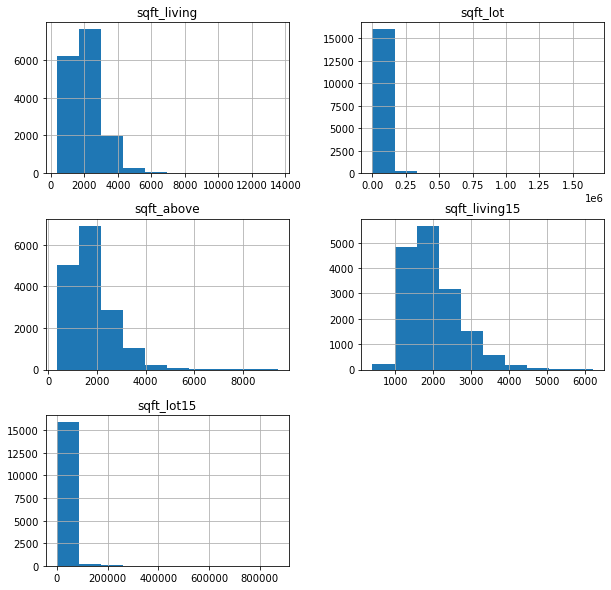

In [298]:
kc_house_quant.hist(figsize=(10,10))

In [299]:
x_train.set_index('id')

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
3905080280,3/4/2015,3,2.50,1880,4499,2.0,0.0,0.0,3,8,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114
5466420030,10/7/2014,3,2.50,2020,6564,1.0,0.0,0.0,3,7,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151
2623069010,1/16/2015,5,4.00,4720,493534,2.0,0.0,0.0,5,9,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542
4443800545,3/30/2015,2,2.00,1430,3880,1.0,0.0,0.0,4,7,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880
9485930120,10/14/2014,3,2.25,2270,32112,1.0,0.0,0.0,4,8,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853230570,9/15/2014,3,2.50,2230,5800,2.0,0.0,0.0,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
4140940150,10/2/2014,4,2.75,2770,3852,2.0,0.0,0.0,3,8,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641
8658300480,7/21/2014,4,1.50,1530,9000,1.0,0.0,0.0,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500


In [300]:
x_train.index.duplicated().any()

False

In [301]:
x_train.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [302]:
x_train[x_train['waterfront'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10881,9407100310,11/13/2014,3,2.50,1260,11877,1.0,NaN,0.0,3,7,1260,0.0,1975,0.0,98045,47.4442,-121.762,1430,9790
14092,3211600650,7/22/2014,3,1.00,1000,8018,1.0,NaN,0.0,3,7,1000,0.0,1969,0.0,98034,47.7285,-122.198,1270,8000
19429,582000644,5/1/2015,4,2.00,1990,6000,1.0,NaN,0.0,3,9,1260,730.0,1956,2015.0,98199,47.6515,-122.397,1770,6000
2264,522049104,7/29/2014,5,1.75,2340,9148,2.0,NaN,0.0,3,7,2340,0.0,1957,0.0,98198,47.4232,-122.324,1390,10019
9558,1310700210,6/3/2014,3,1.75,1970,10270,1.0,NaN,0.0,4,8,1970,0.0,1966,0.0,98032,47.3619,-122.285,1970,8400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19118,7151700360,12/11/2014,5,3.25,2680,3011,2.0,NaN,0.0,3,9,1870,810.0,1910,NaN,98122,47.6115,-122.287,3440,5165
18942,327000165,4/13/2015,4,2.50,2330,30122,1.0,NaN,1.0,3,8,1490,840.0,1951,0.0,98115,47.6843,-122.267,2430,6726
19769,1673000240,11/12/2014,4,2.50,2423,7292,2.0,NaN,0.0,3,8,2423,0.0,2005,NaN,98023,47.3227,-122.370,2495,7489
1685,8680100030,5/21/2014,3,1.75,2000,9416,1.0,NaN,0.0,4,6,2000,0.0,1961,NaN,98033,47.6970,-122.175,1440,9555


In [303]:
waterfront = x_train[['waterfront']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(waterfront)

waterfront_imputed_train = imputer.transform(waterfront)

waterfront_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [304]:
x_train['waterfront'] = waterfront_imputed_train

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [305]:
view = x_train[['view']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(view)

view_imputed_train = imputer.transform(view)

view_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [306]:
x_train['view'] = view_imputed_train

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [307]:
x_train[x_train['yr_renovated'].isna()]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4965,9274200314,8/21/2014,3,2.50,1740,1279,3.0,0.0,0.0,3,8,1740,0.0,2008,NaN,98116,47.5891,-122.387,1740,1280
3119,3271800850,8/6/2014,3,1.75,2440,5800,1.0,0.0,3.0,4,8,1320,1120.0,1945,NaN,98199,47.6474,-122.412,2530,5800
19825,6181420200,11/20/2014,4,2.50,2789,3960,2.0,0.0,0.0,3,7,2789,0.0,2007,NaN,98001,47.3059,-122.280,2547,3960
7132,4232901990,5/16/2014,2,1.00,910,3600,1.0,0.0,0.0,4,7,910,0.0,1909,NaN,98119,47.6341,-122.361,1720,3600
11983,2724049185,3/25/2015,3,1.75,1430,4920,1.0,0.0,0.0,2,6,1430,0.0,1957,NaN,98118,47.5388,-122.275,1550,5646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19118,7151700360,12/11/2014,5,3.25,2680,3011,2.0,0.0,0.0,3,9,1870,810.0,1910,NaN,98122,47.6115,-122.287,3440,5165
19769,1673000240,11/12/2014,4,2.50,2423,7292,2.0,0.0,0.0,3,8,2423,0.0,2005,NaN,98023,47.3227,-122.370,2495,7489
1685,8680100030,5/21/2014,3,1.75,2000,9416,1.0,0.0,0.0,4,6,2000,0.0,1961,NaN,98033,47.6970,-122.175,1440,9555
16023,7640400190,2/13/2015,3,2.00,1770,8141,1.0,0.0,0.0,5,8,1770,0.0,1952,NaN,98177,47.7232,-122.371,1770,8100


In [308]:
renovated = x_train[['yr_renovated']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(renovated)

renovated_imputed_train = imputer.transform(renovated)

renovated_imputed_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [309]:
x_train['yr_renovated'] = renovated_imputed_train

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [310]:
x_train['sqft_basement'] = x_train['sqft_basement'].replace('?', pd.NA)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [315]:
x_train['sqft_basement'].value_counts() == '?'

0.0       False
600.0     False
500.0     False
800.0     False
700.0     False
          ...  
2400.0    False
274.0     False
1816.0    False
243.0     False
2310.0    False
Name: sqft_basement, Length: 279, dtype: bool

In [284]:
basement = x_train[['sqft_basement']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

imputer.fit(basement)

basement_imputed_train = imputer.transform(basement)

basement_imputed_train

TypeError: float() argument must be a string or a number, not 'NAType'

In [ ]:
x_train['sqft_basement'] = basement_imputed_train

In [ ]:
x_train[x_train['sqft_basement'] == 'NaN']

In [ ]:
x_train.isna().any()

In [ ]:
x_test

In [ ]:
x_test.isna().any()

In [ ]:
x_test[x_test['waterfront'].isna()]

In [ ]:
waterfront2 = x_test[['waterfront']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(waterfront2)

waterfront2_imputed_train = imputer.transform(waterfront2)

waterfront2_imputed_train

In [ ]:
x_test['waterfront'] = waterfront2_imputed_train

In [ ]:
x_test[x_test['view'].isna()]

In [ ]:
view2 = x_test[['view']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(view2)

view2_imputed_train = imputer.transform(view2)

view2_imputed_train

In [ ]:
x_test['view'] = view2_imputed_train

In [ ]:
x_test[x_test['yr_renovated'].isna()]

In [ ]:
renovated2 = x_test[['yr_renovated']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(renovated2)

renovated2_imputed_train = imputer.transform(renovated2)

renovated2_imputed_train

In [ ]:
x_test['yr_renovated'] = renovated2_imputed_train

In [ ]:
x_test.isna().any()

In [ ]:
x_train = x_train.drop(['date', 'yr_built','yr_renovated','zipcode','lat','long'], axis = 1)
x_test = x_test.drop(['date', 'yr_built','yr_renovated','zipcode','lat','long'], axis = 1)

In [ ]:
x_test[x_test['sqft_basement'] == '?']

In [ ]:
x_test['sqft_basement'] = x_test['sqft_basement'].replace('?', pd.NA)

In [ ]:
basement2 = x_test[['sqft_basement']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

imputer.fit(basement2)

basement2_imputed_train = imputer.transform(basement2)

basement2_imputed_train

In [ ]:
x_train['sqft_basement'] = basement_imputed_train

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

Now that we have reviewed our data, we can begin to model.

# Section 4: Modeling

In [ ]:
x_kc = kc_house.drop("price", axis=1)
y_kc = kc_house["price"]

import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, x_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the correlation matrix above, it seems that sqft_living and grade are the most correlated with price. As the other sqft variables are correlated amongst themselves, I will exclude the rest and focus on grade and sqft_living. I will make two baseline models based on these two variables

In [ ]:
most_correlated = 'grade'
second_most_correlated = 'sqft_living'

In [ ]:
from sklearn.linear_model import LinearRegression
baseline_model1 = LinearRegression()
baseline_model2 = LinearRegression()

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model1,
    X =x_kc[[most_correlated]],
    y =y_kc,
    return_train_score=True,
    cv=splitter
)

print("Grade Train score:     ", baseline_scores["train_score"].mean())
print("Grade Validation score:", baseline_scores["test_score"].mean())

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model2,
    X =x_kc[[second_most_correlated]],
    y =y_kc,
    return_train_score=True,
    cv=splitter
)

print("Living Sqft Train score:     ", baseline_scores["train_score"].mean())
print("Living Sqft Validation score:", baseline_scores["test_score"].mean())

Now that we have our baseline models, we can deal with multicollinearity of features between our categories.

In [ ]:
df=x_kc.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

In [ ]:
df[(df.cc>.70) & (df.cc <1)]

As we can see above, a lot of the sqft columns have high correlation with each other. Because of this, I will remove all of them except for sqft_living.

In [ ]:
x_kc = x_kc.drop(['sqft_above','sqft_living15','sqft_lot','sqft_lot15'], axis = 1)

Now that multicollinearity has been dealt with, let's take a deeper look into our two variables that are most important.

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x_kc[most_correlated], y_kc, alpha=0.5)
ax.set_xlabel(most_correlated)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x_kc[second_most_correlated], y_kc, alpha=0.5)
ax.set_xlabel(second_most_correlated)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");